In [1]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from crossbeam.data.deepcoder.deepcoder_tasks import HANDWRITTEN_TASKS

In [19]:
programs = [t.solution for t in HANDWRITTEN_TASKS]
# Extracting all numerical values
numerical_values = []
for i in range(-1, 5):
    count = 0
    for p in programs:
        if i == 1 and '-1' in p:
            print(p)
            p = p.replace('-1', 'minusone')
        if ' ' + str(i) in p:
            count += p.count(' ' + str(i))
    
    numerical_values.append(count)

Take(-1, Drop(1, x))
Map((lambda u1: Multiply(If(Less(u1, 0), -1, 1), Square(u1))), x)
Take(-1, Map((lambda u1: Add(u1, Last(x))), x))
Scanl1((lambda u1, u2: Min(u1, u2)), Take(-1, Drop(1, x)))
Filter((lambda u1: Greater(u1, -1)), ZipWith((lambda u1, u2: Subtract(u1, u2)), x, y))


In [20]:
[ele for ele in programs if ' ' + str(2) in ele]

['If(IsEven(x), IntDivide(x, 2), Add(1, Multiply(3, x)))',
 'IntDivide(Add(Head(x), Last(x)), 2)',
 'Map((lambda u1: IntDivide(Add(Square(u1), u1), 2)), x)',
 'Map((lambda u1: Multiply(u1, Add(u1, 2))), x)',
 'Access(IntDivide(Sum(Map((lambda u1: 1), x)), 2), Sort(x))',
 'Map((lambda u1: If(IsEven(u1), IntDivide(u1, 2), u1)), x)',
 'Subtract(Minimum(ZipWith((lambda u1, u2: Add(u1, u2)), t, p)), 2)',
 'ZipWith((lambda u1, u2: IntDivide(Add(u1, u2), 2)), x, y)',
 'Scanl1((lambda u1, u2: Add(IntDivide(u1, 2), u2)), x)']

In [21]:
values_counter = dict(zip([-1, 0, 1, 2, 3, 4], numerical_values))
values_counter

{-1: 2, 0: 17, 1: 8, 2: 9, 3: 2, 4: 1}

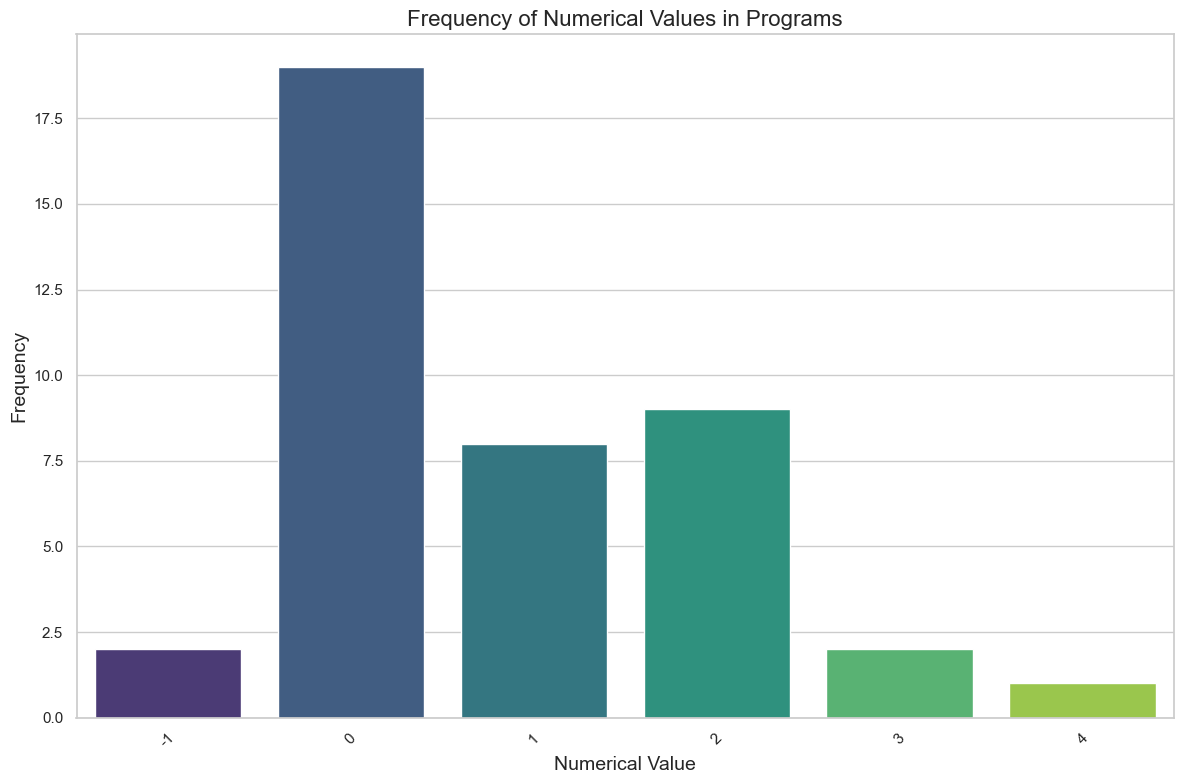

In [12]:
# Setting the seaborn style for prettier plots
sns.set(style="whitegrid")

# Creating a DataFrame for easier plotting with seaborn
import pandas as pd
df_numerical_values = pd.DataFrame(values_counter.items(), columns=['Numerical Value', 'Frequency'])

# Sorting the DataFrame by Numerical Value to have a consistent ordering
df_numerical_values.sort_values(by='Numerical Value', inplace=True)

# Plotting with seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Numerical Value', y='Frequency', data=df_numerical_values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel('Numerical Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Frequency of Numerical Values in Programs', fontsize=16)
plt.tight_layout()
plt.show()